<a href="https://colab.research.google.com/github/Mini1521/Sentiment-Analysis/blob/main/Using_Microsoft_and_Tesla_Dataset_from_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data- preprocessing

In [1]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/CompanyValues.csv")

# Merge the data on a common column (e.g., 'day_date')
merged_df = pd.merge(df1, df2, on="ticker_symbol", how="left")  # Use "outer", "left", or "right" if needed

# Save the merged dataset to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)

print("Merged CSV saved as 'merged_data.csv'")

Merged CSV saved as 'merged_data.csv'


In [2]:
import pandas as pd

# Load the dataset (update the filename if needed)
df = pd.read_csv('/content/merged_data.csv')

df.rename(columns={'post_date': 'date'}, inplace=True)

# Convert 'day_date' to datetime format
df['day_date'] = pd.to_datetime(df['day_date'], errors='coerce')

# Filter data for the year 2020
df_2019 = df[df['day_date'].dt.year == 2019]
df_2019 = df_2019.sort_values(by='day_date', ascending=True)

# Separate data for Microsoft (MSFT) and Tesla (TSLA)
msft_data = df_2019[df_2019['ticker_symbol'] == 'MSFT']
tsla_data = df_2019[df_2019['ticker_symbol'] == 'TSLA']

# Drop rows with missing values
msft_data = msft_data.dropna()
tsla_data = tsla_data.dropna()


# print(" Stock Data Date Range:")
# print(f"Start Date: {msft_data['day_date'].min()} | End Date: {msft_data['day_date'].max()}")
# print(f"Start Date: {tsla_data['day_date'].min()} | End Date: {tsla_data['day_date'].max()}")

# Save each dataset separately
msft_data.to_csv("msft_2019.csv", index=False)
tsla_data.to_csv("tsla_2019.csv", index=False)

print("Data preprocessing complete.")
print("Saved: 'msft_2019.csv' and 'tsla_2019.csv'")


Data preprocessing complete.
Saved: 'msft_2019.csv' and 'tsla_2019.csv'


# Social Media - preprocessing

In [3]:
import numpy as np
import pandas as pd

# Load datasets
company_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company_Tweet.csv")
tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Tweet.csv")

# Merge tweets with company information
tweets = tweets.merge(company_tweets, how='left', on='tweet_id')

In [4]:
# Convert 'post_date' to datetime format
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')
# tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

tweets.to_csv("merged_tweets.csv", index=False)

tweets.drop(columns=['comment_num', 'retweet_num', 'like_num'], inplace=True)

In [5]:
# Filter for Microsoft (MSFT) and Tesla (TSLA)
tweets_filtered = tweets[tweets['ticker_symbol'].isin(['MSFT', 'TSLA'])]

# Keep only tweets from 2019
tweets_filtered = tweets_filtered[tweets_filtered['date'].dt.year == 2019]

# Split into separate datasets
msft_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'MSFT']
tsla_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'TSLA']

# Save to CSV files
msft_tweets.to_csv("msft_tweets_2019.csv", index=False)
tsla_tweets.to_csv("tsla_tweets_2019.csv", index=False)

# Cleaning of microsoft tweets

In [6]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load Twitter dataset
tweets_df = pd.read_csv("/content/msft_tweets_2019.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [8]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)


In [9]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_msft_tweets.csv", index=False)

# Cleaning of tesla tweets

In [10]:
# Load Twitter dataset
tweets_df = pd.read_csv("/content/tsla_tweets_2019.csv")

In [11]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

In [12]:
# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [14]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_tsla_tweets.csv", index=False)

# Microsoft Articles - Preprocessing

In [15]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load the dataset (Update the filename if needed)
article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/msft_articles.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [18]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_msft_articles.csv", index=False)

# Tesla Articles - Preprocessing

In [19]:
# Load the dataset (Update the filename if needed)
article = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/tsla_articles.csv')

In [20]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [22]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_tsla_articles.csv", index=False)

# Sentiment Analysis- microsoft

In [23]:
!pip install textblob

In [23]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_msft_tweets.csv")
news_df = pd.read_csv("/content/cleaned_msft_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [24]:
# VADER Sentiment Analysis for Tweets

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [25]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)

# Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_msft_tweets.csv", index=False)
news_df.to_csv("sentiment_msft_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


In [27]:
# news_df.head()

In [28]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

In [29]:
# # Load preprocessed datasets
# tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
# news_df = pd.read_csv("/content/sentiment_msft_news.csv")

In [30]:
# # Train-test split
# X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2)
# X_news, X_test_news, y_news, y_test_news = train_test_split(news_df['text'], news_df['sentiment'], test_size=0.2)


In [31]:
# # Create ML Pipelines for different models
# def train_model(X_train, y_train, X_test, y_test, model):
#     pipeline = Pipeline([
#         ('tfidf', TfidfVectorizer(max_features=5000)),
#         ('classifier', model)
#     ])
#     pipeline.fit(X_train, y_train)
#     predictions = pipeline.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
#     return pipeline

In [32]:
# # Train models
# models = {
#     'Naïve Bayes': MultinomialNB(),
#     'SVM': SVC(kernel='linear'),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(n_estimators=100)
# }

# trained_models = {name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model) for name, model in models.items()}


Model MultinomialNB Accuracy: 0.7457
Model SVC Accuracy: 0.8935
Model DecisionTreeClassifier Accuracy: 0.8030
Model RandomForestClassifier Accuracy: 0.8520


SVM is the best model, followed by Random Forest Classifier.

*  Model MultinomialNB Accuracy: 0.7461
*  Model SVC Accuracy: 0.8903
*  Model DecisionTreeClassifier Accuracy: 0.8060
*  Model RandomForestClassifier Accuracy: 0.8510

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}


 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7532
Model SVC Accuracy: 0.8911
Model DecisionTreeClassifier Accuracy: 0.8085
Model RandomForestClassifier Accuracy: 0.8568

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.6032
Model SVC Accuracy: 0.6032
Model DecisionTreeClassifier Accuracy: 0.4286
Model RandomForestClassifier Accuracy: 0.5079


Training Models for Tweet Sentiment Classification
* Model MultinomialNB Accuracy: 0.7532
* Model SVC Accuracy: 0.8911
* Model DecisionTreeClassifier Accuracy: 0.8057
* Model RandomForestClassifier Accuracy: 0.8523

Training Models for News Sentiment Classification
* Model MultinomialNB Accuracy: 0.6032
* Model SVC Accuracy: 0.6032
* Model DecisionTreeClassifier Accuracy: 0.4762
* Model RandomForestClassifier Accuracy: 0.5397



In [ ]:
# # Save the best-performing model for predictions
# import joblib
# best_model = trained_models['Random Forest']  # Assuming Random Forest performed best
# joblib.dump(best_model, "sentiment_model.pkl")

# print("Sentiment Analysis Complete")

# Sentiment Analysis- tesla

ALGORITHMS WORKS !!!

In [27]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_tsla_tweets.csv")
news_df = pd.read_csv("/content/cleaned_tsla_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [28]:
# VADER Sentiment Analysis for Tweets

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)

news_df['sentiment'] = news_df['sentiment'].astype(int)

# Function to get sentiment score from TextBlob
# def get_textblob_sentiment(text):
#     score = TextBlob(text).sentiment.polarity
#     return 1 if score > 0 else (-1 if score < 0 else 0)

# # Apply TextBlob sentiment analysis to news articles
# news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)

# # Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_tsla_tweets.csv", index=False)
news_df.to_csv("sentiment_tsla_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


In [30]:
# print(news_df.head())

In [11]:
# tweets_df.dropna(subset=['cleaned_tweet'], inplace=True)
# news_df.dropna(subset=['text'], inplace=True)

# # Ensure text columns are properly formatted
# tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].astype(str)
# news_df['text'] = news_df['text'].astype(str)

# # Remove empty strings
# tweets_df = tweets_df[tweets_df['cleaned_tweet'].str.strip() != ""]
# news_df = news_df[news_df['text'].str.strip() != ""]

# # Verify again
# print("Final Check: Missing in tweets:", tweets_df['cleaned_tweet'].isna().sum())
# print("Final Check: Missing in news:", news_df['text'].isna().sum())


Final Check: Missing in tweets: 0
Final Check: Missing in news: 0


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

tweets_df = tweets_df.sample(min(10000, len(tweets_df)), random_state=42)
news_df = news_df.sample(min(10000, len(news_df)), random_state=42)

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}



 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7215
Model SVC Accuracy: 0.8285
Model DecisionTreeClassifier Accuracy: 0.7720
Model RandomForestClassifier Accuracy: 0.7880

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.5873
Model SVC Accuracy: 0.5556
Model DecisionTreeClassifier Accuracy: 0.5397
Model RandomForestClassifier Accuracy: 0.5238


Training Models for Tweet Sentiment Classification
*   Model MultinomialNB Accuracy: 0.7215
*   Model SVC Accuracy: 0.8285
*   Model DecisionTreeClassifier Accuracy: 0.7720
*   Model RandomForestClassifier Accuracy: 0.7880


Training Models for News Sentiment Classification
*   Model MultinomialNB Accuracy: 0.5873
*   Model SVC Accuracy: 0.5556
*   Model DecisionTreeClassifier Accuracy: 0.5397
*   Model RandomForestClassifier Accuracy: 0.5238


# Merging - Microsoft


In [32]:
import pandas as pd

# Load datasets
stock_data = pd.read_csv("/content/msft_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_msft_news.csv")

In [33]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [34]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [35]:
# # Drop original 'date' columns (Optional)
# stock_data.drop(columns=['day_date'], inplace=True)
# tweets_sentiment.drop(columns=['date'], inplace=True)
# news_sentiment.drop(columns=['date'], inplace=True)

In [36]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_MSFT_TWEET.csv", index=False)

In [37]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_MSFT_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-37-225be7571668>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Merging - Tesla

In [38]:
import pandas as pd

# Load datasets (assuming they are already preprocessed)
stock_data = pd.read_csv("/content/tsla_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_tsla_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_tsla_news.csv")

In [39]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [40]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [41]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_TSLA_TWEET.csv", index=False)

In [42]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_TSLA_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-42-df03a4931140>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Data Analysis (Microsoft)

In [43]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_MSFT_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_MSFT_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("MSFT_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("MSFT_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [44]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/MSFT_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=10, batch_size=32)

# Save Model
model_tweet.save("LSTM_MSFT_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - loss: 0.0070
Epoch 2/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - loss: 0.0011
Epoch 3/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - loss: 5.7812e-04
Epoch 4/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - loss: 4.4507e-04
Epoch 5/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - loss: 4.3611e-04
Epoch 6/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 87s 34ms/step - loss: 4.2871e-04
Epoch 7/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - loss: 4.2286e-04
Epoch 8/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - loss: 4.0990e-04
Epoch 9/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - loss: 3.9768e-04
Epoch 10/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - loss: 4.0152e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 15 mins or so**

In [45]:
# Load News Data
news_data = pd.read_csv("/content/MSFT_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=20, batch_size=32)

# Save Model
model_news.save("LSTM_MSFT_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1458
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0326
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0079
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0065
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0079
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0061
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0054
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0056
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0051
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0056
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0044
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0048
Epoc

✅ LSTM Model Trained for News Sentiment!


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
LSTM Tweet Model - MAE: 0.0045, RMSE: 0.0055
LSTM News Model - MAE: 0.0276, RMSE: 0.0355


# Data Analysis (Tesla)

In [47]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_TSLA_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_TSLA_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("TSLA_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("TSLA_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [48]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/TSLA_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=7, batch_size=32)

# Save Model
model_tweet.save("LSTM_TSLA_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 361s 31ms/step - loss: 0.0015
Epoch 2/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 371s 33ms/step - loss: 3.2266e-04
Epoch 3/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 353s 31ms/step - loss: 2.9954e-04
Epoch 4/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 382s 31ms/step - loss: 2.9170e-04
Epoch 5/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 390s 32ms/step - loss: 2.8555e-04
Epoch 6/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 357s 31ms/step - loss: 2.8475e-04
Epoch 7/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 381s 31ms/step - loss: 2.7793e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 45 mins**

In [49]:
# Load News Data
news_data = pd.read_csv("/content/TSLA_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=25, batch_size=32)

# Save Model
model_news.save("LSTM_TSLA_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0979
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0090
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0084
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0072
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0061
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0057
Epoch 9/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0053
Epoch 10/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0047
Epoch 11/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0056
Epoch 12/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0044
Epoch 13/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0053
Epoch 14/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0053
Epoch 15/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054
Epoc

✅ LSTM Model Trained for News Sentiment!


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

11358/11358 ━━━━━━━━━━━━━━━━━━━━ 98s 9ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
LSTM Tweet Model - MAE: 0.0035, RMSE: 0.0041
LSTM News Model - MAE: 0.0367, RMSE: 0.0500


# Visualization

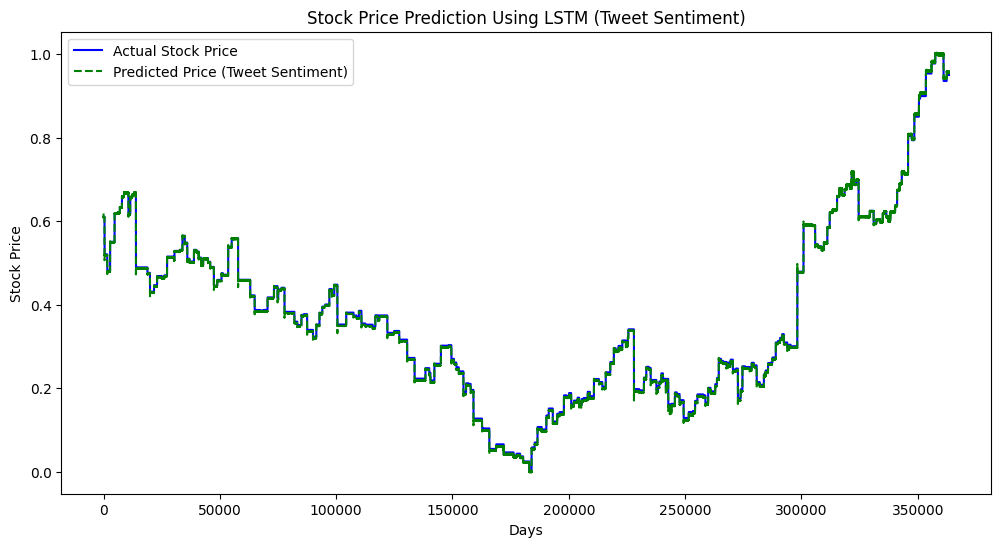

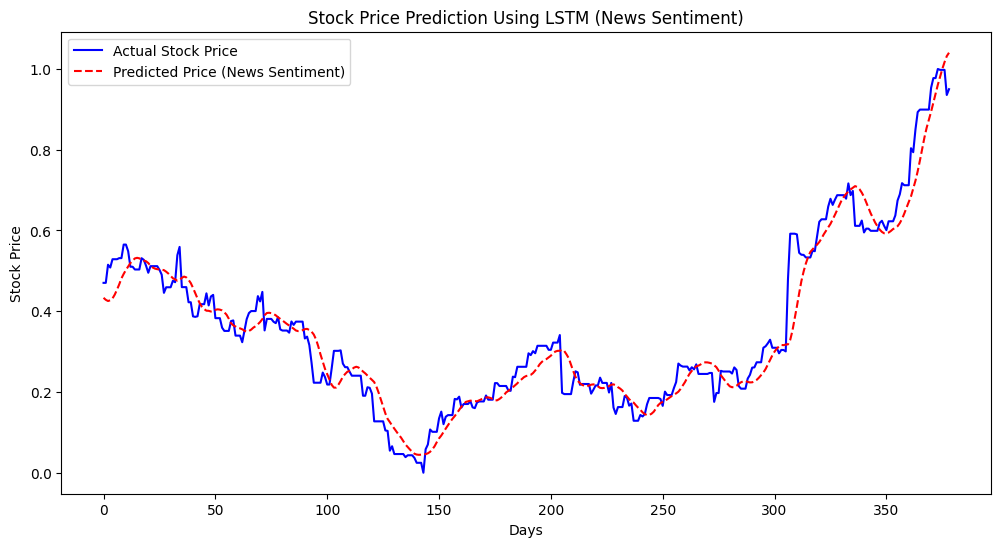

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predictions vs Actual for Tweet Sentiment Model
plt.figure(figsize=(12,6))
plt.plot(y, label="Actual Stock Price", color="blue")
plt.plot(tweet_pred, label="Predicted Price (Tweet Sentiment)", color="green", linestyle="dashed")
plt.title("Stock Price Prediction Using LSTM (Tweet Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot Predictions vs Actual for News Sentiment Model
plt.figure(figsize=(12,6))
plt.plot(y_news, label="Actual Stock Price", color="blue")
plt.plot(news_pred, label="Predicted Price (News Sentiment)", color="red", linestyle="dashed")
plt.title("Stock Price Prediction Using LSTM (News Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [52]:
# Compare LSTM with ML models
print(" Model Performance Comparison:")
print("LSTM Tweet Sentiment Model - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y, tweet_pred), np.sqrt(mean_squared_error(y, tweet_pred))))
print("LSTM News Sentiment Model - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y_news, news_pred), np.sqrt(mean_squared_error(y_news, news_pred))))


correlation_tweet = np.corrcoef(y.flatten(), tweet_pred.flatten())[0, 1]
correlation_news = np.corrcoef(y_news.flatten(), news_pred.flatten())[0, 1]

print(f" Correlation Between Tweet Sentiment & Stock Price: {correlation_tweet:.3f}")
print(f" Correlation Between News Sentiment & Stock Price: {correlation_news:.3f}")


 Model Performance Comparison:
LSTM Tweet Sentiment Model - MAE: 0.0035, RMSE: 0.0041
LSTM News Sentiment Model - MAE: 0.0367, RMSE: 0.0500
 Correlation Between Tweet Sentiment & Stock Price: 1.000
 Correlation Between News Sentiment & Stock Price: 0.972
